In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mpld3

In [2]:
def centroid(moments):
    return (int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])) 

In [3]:
pic = cv2.imread('test.jpg')
img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

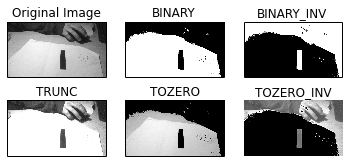

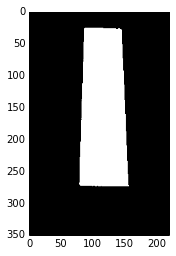

[ 114 62 ]


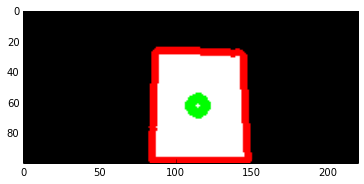

[ 115 50 ]


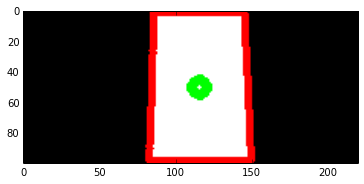

[ 115 50 ]


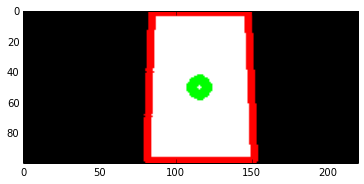

[ 115 50 ]


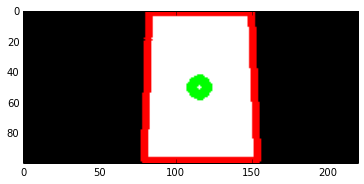

[ 116 37 ]


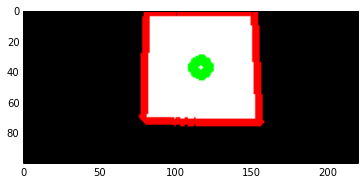

CORD
[114, 62, 116, 237]


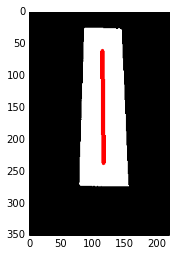

In [4]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 

plt.axis("off")
plt.show()

test = thresh2[350:700,600:820]
plt.imshow(test, 'gray')
plt.show()

cuts = [thresh2[0+x:100+x,600:820] for x in range(350, 600, 50)] #Splices into multiple rectangles

lin = [] # Co-ordinates for the outermost line

count = 0
for i in cuts:
    plt.imshow(i)
    _, contours, hierarchy = cv2.findContours(np.copy(i), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     contD = np.copy(i)
    i = cv2.cvtColor(i, cv2.COLOR_GRAY2RGB) # Remember that cv2 uses bgr
    cord = centroid(cv2.moments(contours[0]))
    cv2.circle(i,(cord[0],cord[1]), 5, (0,255,0), 5)
    print "[",cord[0], cord[1], "]"
    cv2.drawContours(i, contours, -1, (255,0,0), 3)
    plt.imshow(i, 'gray')
#     plt.imshow(
    plt.show()
    
    if count == 0 or count == len(cuts)-1:
        lin.append(cord[0])
        lin.append(cord[1]+count*50)
    count += 1
    
print "CORD"
print lin
# Draw a diagonal blue line with thickness of 5 px


test = cv2.cvtColor(test, cv2.COLOR_GRAY2RGB)
cv2.line(test,(lin[0],lin[1]),(lin[2],lin[3]),(255,0,0),5)
plt.imshow(test, 'gray')
plt.show()



In [20]:
np.arctan((lin[1]-lin[0])/(lin[3]-lin[2]))*(180/np.pi) #I'm really tired right now, so this part might be broken.

-45.0